# Stroke Prediction

### 1. EDA

##### 1-1. 데이터 불러오기

In [6]:
import pandas as pd

# 원본 CSV 불러오기
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# 필터링 적용
df_filtered = df[
    (df['age'] >= 18) & # 18세 이상
    (df['bmi'] < 60) & # bmi 60 미만
    (df['avg_glucose_level'].notnull()) # NA값 제거
]

df_filtered.shape


(4061, 12)

In [7]:
df_filtered.to_csv("stroke_filtered.csv", index=False)

##### 1-2. 상위 데이터 확인 (미리보기)

In [8]:
df_filtered.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
df_filtered.shape

(4061, 12)

##### 1-3. 무결성(결측치) 확인

In [10]:
df_filtered.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

-> bmi 에서 201개의 결측치가 보인다.

##### 1-4. 기본 구조 확인

In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4061 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4061 non-null   int64  
 1   gender             4061 non-null   object 
 2   age                4061 non-null   float64
 3   hypertension       4061 non-null   int64  
 4   heart_disease      4061 non-null   int64  
 5   ever_married       4061 non-null   object 
 6   work_type          4061 non-null   object 
 7   Residence_type     4061 non-null   object 
 8   avg_glucose_level  4061 non-null   float64
 9   bmi                4061 non-null   float64
 10  smoking_status     4061 non-null   object 
 11  stroke             4061 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 412.4+ KB


##### 1-5. 요약 통계량

In [12]:
df_filtered.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000,4061.000000
mean,37165.653534,49.917508,0.109825,0.059591,107.619150,30.324206,0.051219
std,20978.985711,17.800948,0.312710,0.236757,46.948945,6.947008,0.220471
min,84.000000,18.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18827.000000,36.000000,0.000000,0.000000,77.290000,25.400000,0.000000
50%,37728.000000,50.000000,0.000000,0.000000,92.210000,29.200000,0.000000
75%,55351.000000,63.000000,0.000000,0.000000,115.290000,34.100000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,59.700000,1.000000


##### 1-6. stroke 분포 확인

▶ Stroke counts
stroke
0    3853
1     208
Name: count, dtype: int64

▶ Stroke ratio
stroke
0    0.948781
1    0.051219
Name: proportion, dtype: float64


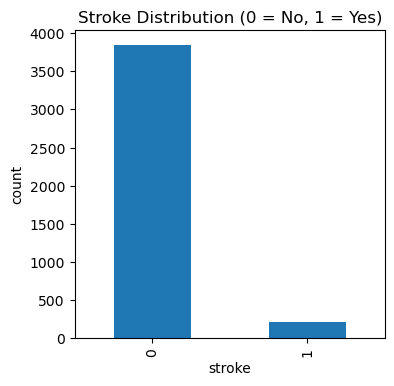

In [13]:
# 1. stroke 분포 확인 (개수 & 비율)
stroke_counts = df_filtered['stroke'].value_counts()
stroke_ratio = df_filtered['stroke'].value_counts(normalize=True)

print("▶ Stroke counts")
print(stroke_counts)
print("\n▶ Stroke ratio")
print(stroke_ratio)

# 2. 막대그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
stroke_counts.plot(kind='bar')
plt.title('Stroke Distribution (0 = No, 1 = Yes)')
plt.xlabel('stroke')
plt.ylabel('count')
plt.show()


-> 필터링 후 최종 데이터 4061개 중 (stroke 0) 94.88& : (stroke 1) 5.12% 의 비율로 불균형 데이터셋이다.

##### 1-7. stroke 별 boxplot

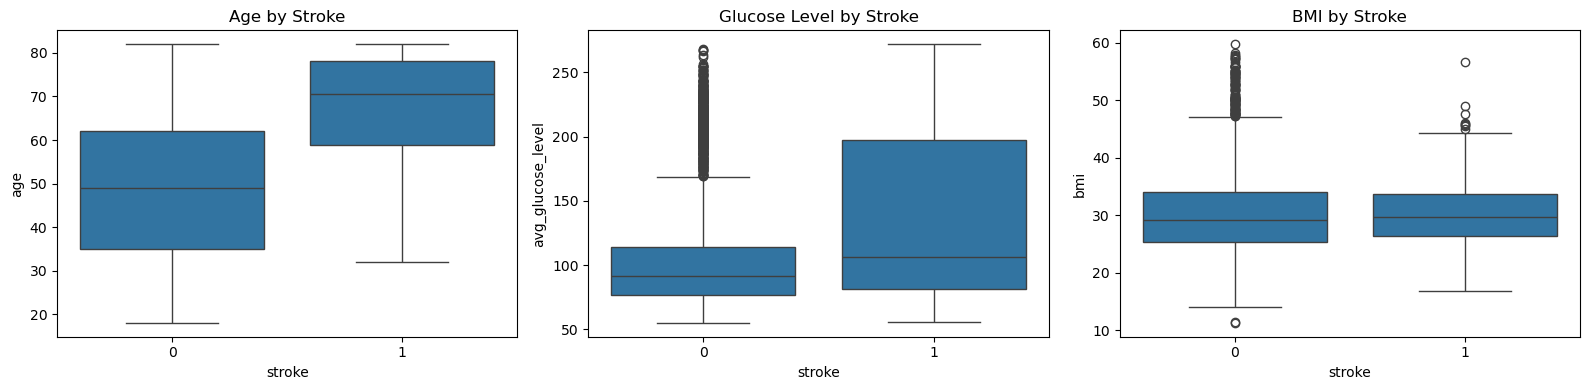

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

# age
plt.subplot(1,3,1)
sns.boxplot(data=df_filtered, x='stroke', y='age')
plt.title("Age by Stroke")

# glucose
plt.subplot(1,3,2)
sns.boxplot(data=df_filtered, x='stroke', y='avg_glucose_level')
plt.title("Glucose Level by Stroke")

# bmi
plt.subplot(1,3,3)
sns.boxplot(data=df_filtered, x='stroke', y='bmi')
plt.title("BMI by Stroke")

plt.tight_layout()
plt.show()


##### 1-8. 범주형 변수 시각화

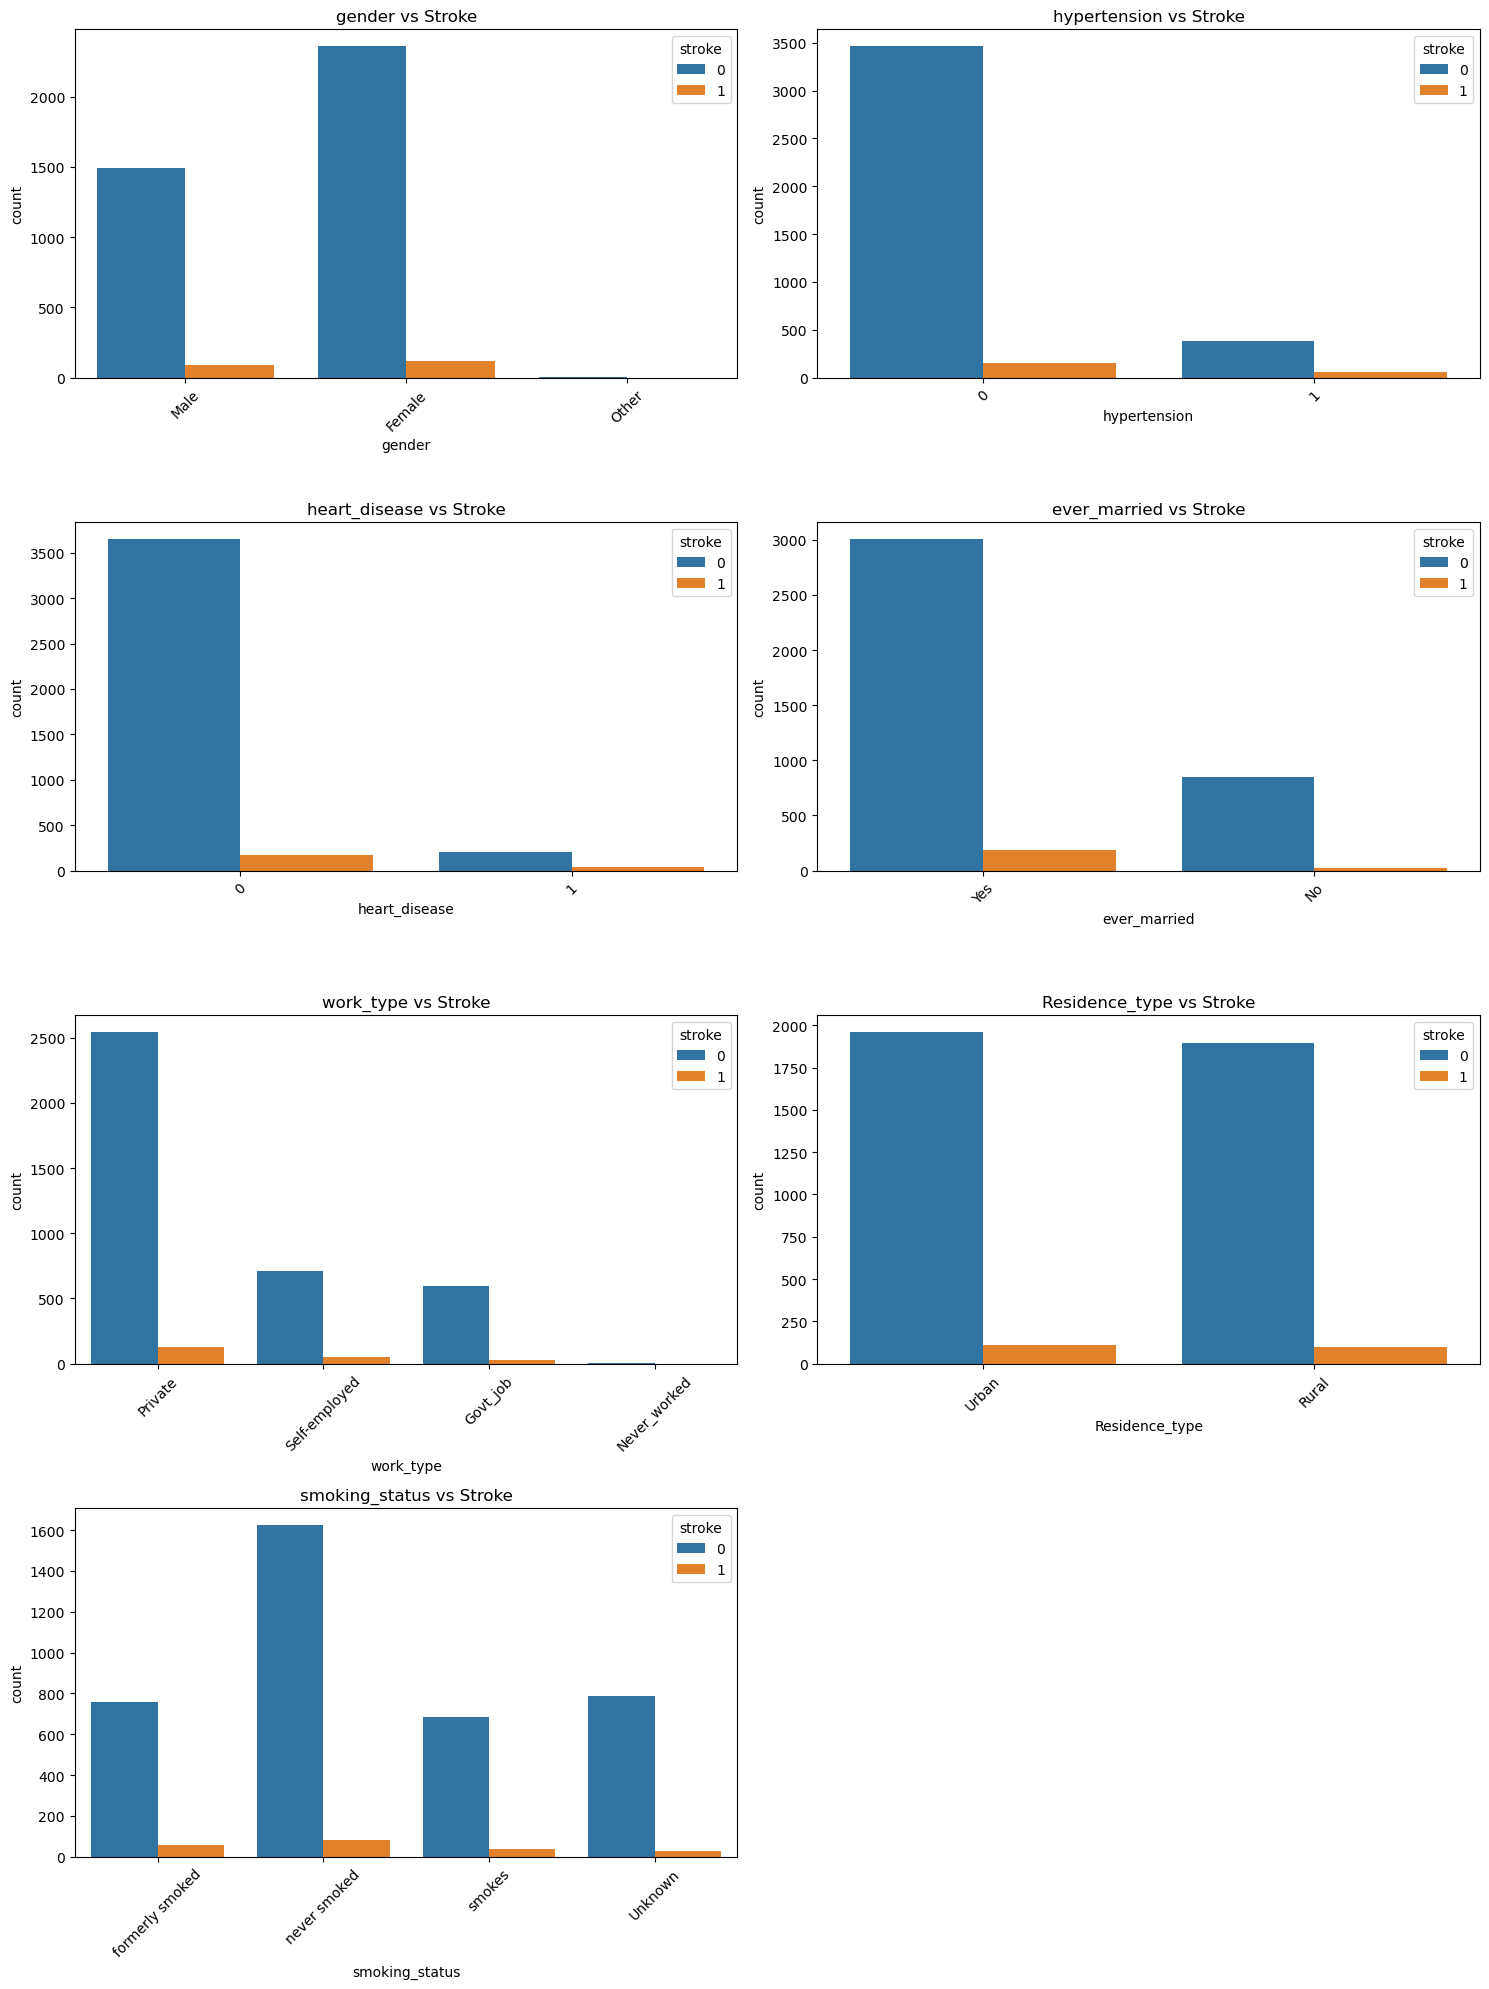

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['gender', 'hypertension', 'heart_disease', 
                    'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df_filtered, x=col, hue='stroke')
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


-> 파란색 대비 주황색의 상대적 크기

In [16]:
# 바그래프를 수치화 했을 때
ategorical_cols = ['gender', 'hypertension', 'heart_disease', 
                    'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    print(f"\n### {col} ###")
    print(
        df_filtered.groupby(col)['stroke']
        .value_counts(normalize=True)
        .unstack()
        .round(3) * 100
    )



### gender ###
stroke      0    1
gender            
Female   95.2  4.8
Male     94.4  5.6
Other   100.0  NaN

### hypertension ###
stroke           0     1
hypertension            
0             95.9   4.1
1             86.5  13.5

### heart_disease ###
stroke            0     1
heart_disease            
0              95.6   4.4
1              83.5  16.5

### ever_married ###
stroke           0    1
ever_married           
No            97.5  2.5
Yes           94.2  5.8

### work_type ###
stroke             0    1
work_type                
Govt_job        95.5  4.5
Never_worked   100.0  NaN
Private         95.2  4.8
Self-employed   93.0  7.0

### Residence_type ###
stroke             0    1
Residence_type           
Rural           95.0  5.0
Urban           94.7  5.3

### smoking_status ###
stroke              0    1
smoking_status            
Unknown          96.6  3.4
formerly smoked  93.0  7.0
never smoked     95.1  4.9
smokes           94.6  5.4


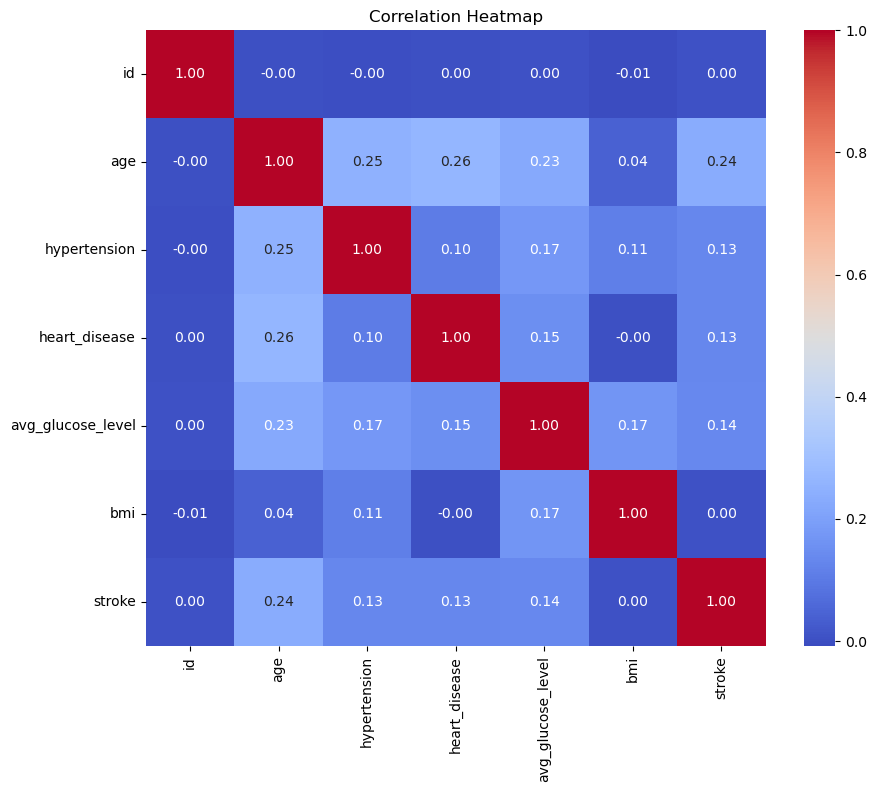

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df_filtered.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


-> age

avg_glucose_level

hypertension

heart_disease

### 2. 전처리

##### 2-1. Feature / Target 분리

In [18]:
# 1. Feature / Target 분리
X = df_filtered.drop('stroke', axis=1) # stroke는 예측해야 하는 label
y = df_filtered['stroke']

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (4061, 11)
y shape: (4061,)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


##### 2-2. 범주형 변수 Label Encoding

In [19]:
# 범주형 변수 5개
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [20]:
# 범주형 데이터 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 2. Label Encoding
le = LabelEncoder()
X_encoded = X.copy()

for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

X_encoded.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1


##### 2-3. Train / Test split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y) # stroke 데이터가 불균형하기 때문 

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (3248, 11) (3248,)
Test: (813, 11) (813,)


### 3. 모델링

##### 3-1. 로지스틱 회귀 모델

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 선언 (불균형 데이터에 맞춰 class_weight='balanced')
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced')

# 학습
log_clf.fit(X_train, y_train)

# 예측
y_pred = log_clf.predict(X_test)

# 정확도 출력
print("Accuracy:", accuracy_score(y_test, y_pred))

# 상세 평가표
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7392373923739237

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       771
           1       0.13      0.71      0.22        42

    accuracy                           0.74       813
   macro avg       0.55      0.73      0.53       813
weighted avg       0.94      0.74      0.81       813


Confusion Matrix:
[[571 200]
 [ 12  30]]


/home/dayeon/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
